<a href="https://colab.research.google.com/github/Maucho6340/2160-aprendiendo-a-clasificar-datos-con-ml/blob/main/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv('/content/marketing_inversiones.csv')

In [3]:
datos.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


Para crear modelos de clasificación, necesitamos utilizar <font color='red'> datos de calidad, sin inconsistencias y sin datos faltantes.<br>

 Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


##### <font color='blue'>**Para saber más**: ¿Qué es Machine Learning?

La Inteligencia Artificial (IA) se ha destacado como una de las áreas de mayor crecimiento y visibilidad en los últimos años. Es un campo de estudio amplio que abarca diversas áreas del conocimiento, tanto prácticas como teóricas, incluyendo la ciencia de la computación, la ciencia cognitiva, la filosofía de la mente y el Machine Learning (Aprendizaje Automático).

El Machine Learning (ML), como una subárea de la inteligencia artificial, se concentra en el desarrollo de algoritmos que son utilizados en la computadora para realizar tareas sin la necesidad de programar explícitamente las reglas que se utilizarán. Estos algoritmos basan sus decisiones a partir de datos con el objetivo de comprender e identificar el patrón existente en esos datos, para luego utilizar ese conocimiento en la realización de predicciones.<br>

**Cómo funciona el Machine Learning**<br>
El funcionamiento del Machine Learning tiene 3 etapas principales:

1 - **Recolección de datos**

La primera etapa de un proyecto de ML es la extracción o recolección de datos. Los datos son esenciales y pueden considerarse la materia prima de los algoritmos. La cantidad y calidad de estos datos tienen un impacto muy grande en el aprendizaje de los modelos. Con pocos datos, el modelo puede no tener información suficiente para aprender. Con datos de poca calidad, el modelo puede no ser capaz de diferenciar bien el patrón de los datos o comprender el patrón de manera diferente a lo que ocurre con los datos del mundo real.

2 - **Entrenamiento de los modelos**

Después de recolectar datos y asegurar que tienen calidad, se llega a la etapa de entrenar los modelos. El entrenamiento consiste en que el algoritmo busque el patrón presente en los datos y construya una regla para tomar decisiones posteriormente en nuevos datos.

3 - **Evaluación**

Con el modelo entrenado, se llega a la etapa de evaluar el desempeño del modelo, para identificar si realmente aprendió el patrón de los datos y si es capaz de aplicar de forma satisfactoria la regla generada por el algoritmo en datos nuevos, que no fueron utilizados durante el momento del entrenamiento.

A pesar de ser las etapas principales, estas no son las únicas tareas presentes en proyectos de Machine Learning. Cada proyecto tiene sus propias características, ya sea por el formato y naturaleza de los datos, el tipo de aplicación o los desafíos encontrados a lo largo del proceso.

## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es **la exploración y comprensión de los datos, conocida como **análisis exploratorio****. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

Aquellas que establecen una categoría o una clase. Para su análisis de como se encuentran distribuidos mis datos al interior de cada una de estas categoría, vamos a utilizar un histograma de distribución.

In [5]:
import plotly.express as px

In [6]:
px.histogram(datos, x='adherencia_inversion', text_auto=True)

También puedo relacionar variables categóricas. En este caso con el estad civil.

In [7]:
# Histograma de barras que relaciona adherencia a la inversión con estado civil
px.histogram(datos, x='estado_civil', text_auto=True, color='adherencia_inversion', barmode='group') #barmode='group' entrega gráfico de barras agrupadas

Comenzamos a tener una idea general de lo que está pasando. Indistintamente de  su estado civil, la mayoría no se adhirió. Casi el 50% de casados no se adhirieron, en los divorciados solo un 15% no e añadieron, 20 a 25% en los solteros.

Ahora relacionamos con escolaridad

In [8]:
px.histogram(datos, x='escolaridad', text_auto=True, color='adherencia_inversion', barmode='group')

Predomina los no añadidos, menor diferencia entre los ed superior y su comportamiento es similar a los divorciados; en ed secundaria el comportamiento es similar al estado civil casado y en los ed primaria es semejante al comportamiento a los secundarios.

In [9]:
px.histogram(datos, x='default', text_auto=True, color='adherencia_inversion', barmode='group')

In [10]:
px.histogram(datos, x='prestatario', text_auto=True, color='adherencia_inversion', barmode='group')

##### <font color='blue'>**Para saber más**: ¿qué es clasificación?


Dentro del área de Machine Learning, existen diferentes tipos de aprendizaje: el supervisado, semi supervisado, no supervisado y por refuerzo. La tarea de clasificación es solo una entre las tareas realizadas por los algoritmos, que forma parte del aprendizaje supervisado. Con el organigrama a continuación, observa los flujos que se establecen en estas relaciones.

https://cdn1.gnarususercontent.com.br/6/408002/3ccdd384-4f77-4c04-958c-82bcd9d31672.png


**TIPOS DE APRENDIZAJE EN MACHINE LEARNING:**

- Aprendizaje supervisado: a) Clasificación, b)Regresión
- Aprendizaje semi-supervisado
- Aprendizaje no supervisado
- Aprendizaje por refuerzo

Imagina un grupo de jóvenes que está aprendiendo a identificar diferentes estilos musicales. Tienen un mentor que posee una colección de canciones en su dispositivo de audio, cada una debidamente etiquetada con el género musical correspondiente, pero los jóvenes no pueden distinguir los géneros musicales por sí mismos. Al principio, el mentor comienza a reproducir varias canciones y, al mismo tiempo, dice cuál es el género de cada una de ellas. Ellos escuchan con atención y, a lo largo del tiempo, comienzan a asociar las características musicales, como el ritmo, la instrumentación y los vocales, a los diferentes géneros.

En este ejemplo, los jóvenes se basan en algunas características como ritmos rápidos y vocales enérgicos que encajan en el género pop, mientras que las canciones con guitarras distorsionadas y vocales más intensos se dirigen al género rock. Con base en este proceso, los jóvenes logran identificar el género de nuevas canciones que no fueron previamente etiquetadas por el mentor, pero usando las reglas que aprendieron, fueron capaces de etiquetar y nombrar los nuevos elementos.

El aprendizaje supervisado en Machine Learning sigue este mismo razonamiento. Utiliza conjuntos de datos etiquetados, es decir, bases de datos con registros históricos que contienen la respuesta correcta en cada uno de los registros. Para entonces, a partir de esta respuesta y de las características de los datos, el algoritmo puede trazar una regla para llegar a la respuesta que podrá ser utilizada posteriormente en nuevos datos, con el fin de hacer una predicción.

La característica principal de la clasificación se da por el tipo de dato presente en la respuesta, que debe ser del tipo categórica. Un dato del tipo categórico es aquel que tiene diferentes clases o categorías. Como ejemplos de aplicaciones de clasificación con Machine Learning, tenemos:

- Filtrado de correos electrónicos spam
- Diagnósticos médicos
- Análisis textual de sentimientos
- Detección de fraudes bancarios


##### <font color='blue'>**Para saber más**: Tipos de variables

En una base de datos utilizada en proyectos de Machine Learning, podemos llamar a las columnas variables. Este concepto, proveniente de la estadística, representa una característica de interés que se mide en cada elemento de una muestra o población. El nombre indica que el valor varía de elemento a elemento, pudiendo tener valores numéricos o no numéricos.

Las variables se dividen de la siguiente forma:

**Variables cuantitativas o numéricas**:<br>
Son características que pueden ser medidas a partir de valores numéricos que tienen sentido y se dividen entre variables discretas y continuas.

- Variables discretas: Características medidas solo por un número finito o contable de valores. Solo tiene sentido para valores enteros. Por ejemplo: número de hijos, número de ventas.
- Variables continuas: características medidas que asumen valores en una escala continua (en la recta real), en la que tienen sentido valores fraccionarios. Ejemplo: peso, tiempo, altura.<br>

**Variables cualitativas o categóricas**:<br>
Son características que no poseen valores cuantitativos y se definen por varias categorías o clases. Se dividen en nominales y ordinales.

- Variables nominales: no existe ordenación entre las categorías. Ejemplo: sexo biológico, país, churn.
- Variables ordinales: existe una ordenación entre las categorías. Ejemplo: escolaridad, mes.<br>

<font color='green'>Atención: Un punto importante a tratar es que no siempre una variable representada por números es cuantitativa.

Por eso, es esencial tener una postura crítica y evaluar la información detrás del dato, y no solo fijarse en la forma en que está disponible. Por ejemplo, una información de ID de registro puede ser un número, sin embargo, su función está en categorizar un elemento. De la misma forma, una información de escolaridad puede estar representada con los valores 1, 2 y 3, y aun así no los transforma en una variable numérica. Esta información no puede ser utilizada para hacer sumas y calcular promedios, por ejemplo.

### Variables numéricas

Edad, saldo, último contacto y cantidad de contactos

In [11]:
import plotly.express as px

fig = px.box(datos, x='edad', color='adherencia_inversion')
fig.show()

Estas son medidas de tendencia central. Promedio, mediana 39 años, 1er Quantil (hasta 25% de mis datos) entre 22 y 33 años. 3er Quantil menor de 48 y menor de 50. Para el valor máximo 70 años y 77 años. Los punto son valores atípicos, outliers, se salen del patrón.

Permite identificar estos patrones y con ello no dejaré que mi modelo se centre en los punto outliers, para ello tengo que quitarlos.

In [12]:
fig = px.box(datos, x='saldo', color='adherencia_inversion')
fig.show()

Aquí tenemos muchos outliers. La mediana de los que si es 70 dólares, y 411 de los que no. Los mínimos, los que sí, -1200 dólares, los que no 921 dólares, el 25% de la peronas que no han estado en -61 dólares, los que si 158 dólares. El 3er quantil hasta el 75 % de los que no 1940 dólares, de los que si menos de 2144 dólares. Los máximos, los que si 5106, los que no 3342 dólares.

In [13]:
fig = px.box(datos, x='ultimo_contacto', color='adherencia_inversion')
fig.show()

La mediana de los que no, hace 179 días, los que si 452 días. Mínimo loss que si 30 días, los que no 5 días. Máximo para no 599 días, y el que adhirió 4 a 5 años.

In [14]:
fig = px.box(datos, x='ct_contactos', color='adherencia_inversion')
fig.show()

Comportamiento muy similar. Los outliers son átipicos.

##### <font color='blue'>**DESAFÍO**: Hora de practicar

Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

3 - Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

Recuerda que la práctica es fundamental para mejorar tus habilidades en Machine Learning. Con cada actividad, estarás un paso más cerca de dominar este campo de la tecnología. Utiliza los recursos disponibles, colabora con tus compañeros y no tengas miedo de cometer errores. Después de todo, es con los desafíos que crecemos.

In [15]:
import pandas as pd

In [16]:
datos_desafio = pd.read_csv('/content/churn.csv')
datos_desafio = datos_desafio.drop('id_cliente', axis=1)
datos_desafio

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


In [17]:
datos_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [18]:
import plotly.express as px

In [19]:
px.histogram(datos_desafio, x = 'churn', text_auto = True)

In [20]:
px.histogram(datos_desafio, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

In [21]:
px.histogram(datos_desafio, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

In [22]:
px.histogram(datos_desafio, x = 'tiene_tarjeta_credito', text_auto = True, color = 'churn', barmode = 'group')

In [23]:
px.histogram(datos_desafio, x = 'miembro_activo', text_auto = True, color = 'churn', barmode = 'group')

In [24]:
px.box(datos_desafio, x = 'score_credito', color = 'churn')

In [25]:
px.box(datos_desafio, x = 'edad', color = 'churn')

In [26]:
px.box(datos_desafio, x = 'años_de_cliente', color = 'churn')

In [27]:
px.box(datos_desafio, x = 'saldo', color = 'churn')

In [28]:
px.box(datos_desafio, x = 'servicios_adquiridos', color = 'churn')

In [29]:
px.box(datos_desafio, x = 'salario_estimado', color = 'churn')

# 2.Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [30]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


Estas variables: edad	estado_civil	escolaridad	default	saldo	prestatario	ultimo_contacto	ct_contactos, me van a explicar por qué la persona se adhirió o no a la inversión. Entonces debo separar en variables explicativas (las anteriores) y la variable respuesta, adherencia_inversión.<br>
Para generar las variables explicativas utilizaré una X mayúscula.

In [31]:
X = datos.drop('adherencia_inversion', axis=1) #Quitamos la variable respuesta de nuetras variable explicativa
y = datos['adherencia_inversion'] #Variable respuesta

In [32]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [33]:
y

,adherencia_inversion
0,si
1,si
2,no
3,si
4,si
...,...
1263,si
1264,si
1265,si
1266,si


In [34]:
type(y)

pandas.core.series.Series

In [35]:
type(X)

pandas.core.frame.DataFrame

##### <font color='blue'>**Para saber más**: Biblioteca Scikit-Learn

Además de los datos, hay algo que se vuelve indispensable en los proyectos de Machine Learning, que son los algoritmos. Es claro que no necesitamos crear los algoritmos desde cero, están disponibles de forma gratuita a través de una biblioteca del lenguaje Python, Scikit-Learn. Esta ofrece no solo una amplia variedad de algoritmos, sino también herramientas de preprocesamiento de datos, análisis y evaluación de modelos.

Uno de los puntos más positivos de la biblioteca es su documentación, que está bien organizada y tiene una navegación intuitiva. Contiene la explicación y ejemplos de uso de todas las funciones, además de información teórica sobre diversos temas relacionados con Machine Learning. La documentación sin duda debe formar parte del día a día de la persona científica de datos, desde el nivel inicial hasta el más avanzado de conocimiento.

El otro punto ventajoso de esta biblioteca es su uso simple. Con pocas líneas de código es posible entrenar un modelo, abstraiendo todos los detalles complejos que ocurren detrás de escena. Por esta razón, se ha convertido en una de las principales bibliotecas para trabajar con datos y, sobre todo, Machine Learning.

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

## Transformando las variables explicativas

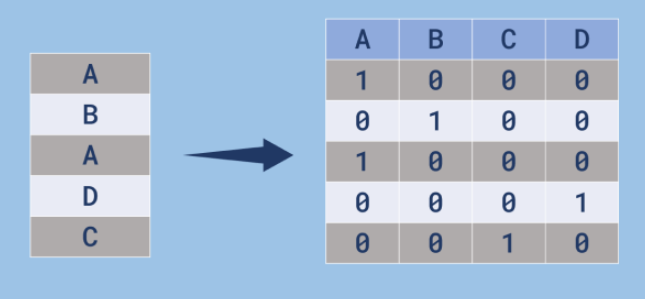

In [36]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


Estado civil tienen 3 categorías: Casado, Soltero y Divorciado. No puedo asignar simplemente 1, 2 ó 3 por que el modelo va a categorizar que divorciado es de mayor peso. La idea es no sesgar. Tenemos variables binarias como si-no.<br>
Para no dar mas peso a una variable que a otra vamos a recurrir a la tabla onehotencoder y utilizar el método one hold encoder, para ello vamos a apoyarnos en dos recursos de scikitlearn que nos ayudará a efectuar la mejor codificación posible para nuestra variables. make_column_transformer.

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
columnas = X.columns

In [39]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['estado_civil', 'escolaridad', 'default', 'prestatario']),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False
)

In [40]:
X = one_hot.fit_transform(X)

In [41]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

##### <font color='blue'>**Para saber más**: One Hot Encoding

Los algoritmos de Machine Learning no pueden comprender información que no esté en formato numérico. Por lo tanto, si se desea utilizar variables categóricas en modelos, es necesario que pasen por algún tipo de tratamiento para que estén en formato numérico. Esto no significa que se convertirán en variables numéricas, solo que estarán en un formato que sea comprendido por los modelos.

Así, estas transformaciones deben preservar la información real de las categorías de la mejor manera posible, sin introducir sesgos en el modelo y sin información que esté alejada de la realidad.

La forma ideal de hacer este tipo de transformación, que mantiene la información original, se conoce como one hot encoding. Esta acción transforma cada una de las clases de las variables categóricas en nuevas columnas, utilizando el valor 0 para representar la ausencia de la característica y 1 para la presencia de la característica en la muestra de la base de datos. Observa en detalle el dinamismo de este proceso en la imagen a continuación.<br>

|  | |A|B|C|D|
|---|---|---|---|---|---|
|A|   |1|0|0|0|
|B|   |0|1|0|0|
|A|   |1|0|0|0|
|D|   |0|0|0|1|
|C|   |0|0|1|0|

Hay una forma muy simple de hacer esta transformación usando la <u>biblioteca pandas</u>, a partir de la función <u>pd.get_dummies()</U>, sin embargo, no es un método muy recomendado cuando estamos trabajando con Machine Learning, ya que esta función no puede abstraer y ejecutar la misma transformación para un nuevo dato. Si tienes una nueva información que pertenece solo a una de las clases de una variable objetivo, el proceso de get_dummies no será capaz de generar las otras columnas provenientes de las otras clases. Esto se convierte en un problema para el modelo, ya que espera todas las características para realizar una predicción.

El método más recomendado para realizar la transformación en proyectos de Machine Learning es el <u><font color='blue'>OneHotEncoder</font></u>. En un primer momento, con los datos iniciales, comienza su acción comprendiendo las características de los datos y genera las nuevas columnas para cada clase. Además, almacena la regla capaz de hacer este procedimiento para nuevos datos. Por lo tanto, en el proceso de transformación de un nuevo dato, puede crear todas las columnas necesarias, aunque este nuevo dato tenga solo la información de una de las clases.

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [42]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

Cómo quedó nuestra variable explicativa (matriz X) notamos que ya queda como array bidimensional, pero no se que significa cada uno de estos valores, y por ello ponemos **get_features_names_out** de las columnas para visualizar estos valores. De modo que si generara un DF para ver de forma mas cercana en que consisten estos valores, entonces puedo ecribir el siguiente código.

In [43]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


Se muestra el DF con los valores que asignó, se puede ver mas de cerca cada caso, en los caos de valores negativos puso cero.

In [44]:
# Misma transformación para la variable respuesta, cero para no y 1 para si
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder=LabelEncoder()

In [46]:
y = label_encoder.fit_transform(y)

In [47]:
y

array([1, 1, 0, ..., 1, 1, 1])

De esta manera ya tenemos nuestra variable de respuesta en un array, que vendría siendo un array unidimensional y lass variables explicativas en un array bidemensional o matriz. Tenemos los datos listos para inciar nuestro modelado de Machine Learning

##### <font color='blue'>**Desafío**: hora de la práctica

Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

1. Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.<br>
1. Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el OneHotEncoder, utilizando el parámetro drop='if_binary' si alguna variable tiene solo 2 categorías.<br>
1. La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método LabelEncoder para realizar la transformación de la variable churn.<br>

La búsqueda de la solución a cualquier desafío comienza con la exploración y comprensión profunda del problema. Tómate un tiempo para comprender la necesidad de cada cuestión y desarrolla, con base en tu aprendizaje, las posibles soluciones. Además, recuerda que la práctica constante es la clave para el perfeccionamiento. A medida que aplicas lo que aprendes, los conceptos se solidifican y se convierten en parte de tu conocimiento práctico.

<font color='blue'>**Solución para los desafíos**


1 - Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna churn. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

Para almacenar la columna churn en y, podemos usar la selección de columnas de la biblioteca pandas. Lo mismo se puede hacer para seleccionar las columnas en x, sin embargo, de forma más simple, podemos usar el método drop para eliminar la columna churn y almacenar todo lo demás en x:

In [48]:
x_desafio = datos_desafio.drop('churn', axis = 1)
y_desafio = datos_desafio['churn']

¡Listo! Ahora tenemos la separación de las variables para indicar al modelo cuál es la respuesta y cuáles son las columnas que explican esa respuesta.

2 - Para realizar la transformación de las variables categóricas, primero necesitamos identificar cuáles son las columnas que requieren este tipo de transformación.

En la base de datos de churn, las columnas categóricas son:

pais: 3 categorías
sexo_biologico: 2 categorías
tiene_tarjeta_credito: 2 categorías
miembro_activo: 2 categorías
La columna país necesita pasar por una transformación para que al final se generen 3 columnas, una para cada país distinto. Cada columna indicará con 0 si el registro no es del respectivo país y 1 si lo es. Como las demás columnas solo necesitan cambiar los valores de las dos categorías a 0 y 1, podemos usar el parámetro drop = 'if_binary' para que al final del proceso se elimine una de las columnas generadas y se mantenga solo una.

Vamos a importar las funciones y usar el método make_column_transformer para indicar cuáles son las columnas que necesitan el tratamiento de datos y cuáles no:

In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

Para visualizar mejor los datos transformados, podemos almacenar el nombre de las columnas originales para obtener el nombre de las columnas después de la transformación. Luego de esto, usaremos el método fit_transform para realizar la transformación y visualizar los datos en un DataFrame:

In [51]:
columnas = x_desafio.columns

In [52]:
x_desafio = one_hot.fit_transform(x_desafio)

In [53]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

Resultado en el nombre de las columnas transformadas:

In [54]:
pd.DataFrame(x_desafio, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__sexo_biologico_Mujer,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


3 - Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el LabelEncoder, que es el método recomendado para esta tarea. El proceso para utilizar este método es bastante simple. Primero tenemos que importar la función, luego inicializar en una variable y, por último, usar el método fit_transform en los datos y:

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder = LabelEncoder()

In [57]:
y_desafio = label_encoder.fit_transform(y_desafio)
y_desafio

array([1, 0, 1, ..., 1, 1, 0])

Resolver desafíos y encontrar soluciones es una parte fundamental de cualquier viaje de aprendizaje, especialmente en Machine Learning. La solución a cualquier desafío comienza con el análisis y la acción exploratoria del problema. Por lo tanto, sigue avanzando y aprovecha cada desafío como una oportunidad para desarrollar tus habilidades en análisis de datos.

# 3 Ajustando modelos

Antes de ajustar un modelo, debemos egmentar nuestra base en dos, una para entrenamiento y otra para prueba. En el entrenamiento, yo debo motrale a mi modelo, a través de las variables explicativas, cual será la respuesta durante sus ejecución. En un aprendizaje, utilizando clasificación, nosotros estamos enseñándole la salida del modelo, lo que quiere decir que es una forma de aprendizaje automática supervisada puesto que está viendo la salida. En mi base de entrenamiento, mi modelo va a estar viendo siempre la salida para poder generalizar hallando patrones dentro de la diversas combinaciones de características explicativas que puedan justificar esa respuesta.<br>

La idea de entrenar, es que ese modelo despupes sea probado con datos que nunca haya visto, para ver si está generalizando bien o no. Pues sucede que mientras yo estot entrenando el modelo, yo le estoy mostrando las salidas y el modelo podría memorizarlas y no poder analizar los datos nuevos. De ahí la importancia de hacer esta eparación de datos para entrenamiento y datos para prueba.

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [58]:
from sklearn.model_selection import train_test_split #train_test_split separa en entrenamiento y prueba

Ahora procedemos a separar los datos para prueba y entrenamiento, recibiendo la transformación de nuestra variables explicativas y respuesta en array X y array y

In [59]:
# test_size indica el % para prueba. stratify asegura tener la misma proporción de resuestas en ambos grupos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=5)

##### <font color='blue'>**Para saber más**: Overfitting y Underfitting

Una tarea muy importante para la evaluación de modelos de machine learning es la división de los datos entre entrenamiento y prueba. El conjunto de entrenamiento se utiliza para que el modelo comprenda patrones y relaciones en los datos para que pueda crear una regla para hacer predicciones. El conjunto de prueba, por su parte, se reserva para evaluar el desempeño del modelo en datos que no se utilizaron en el entrenamiento, simulando la capacidad del modelo de generalizar a nuevos datos.

Existen dos conceptos que están muy ligados a esta división de los datos y que son muy relevantes en los proyectos de machine learning: el overfitting y el underfitting.

**Overfitting (Sobreajuste):**<br>
El overfitting ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento. Esto indica que el modelo capturó no solo el patrón de los datos, sino también ruidos y variaciones aleatorias que están presentes en los datos utilizados para el entrenamiento. Como resultado de esto, el modelo tiene un resultado muy bueno al ser evaluado con los datos de entrenamiento, sin embargo, su desempeño en los datos de prueba o en datos nuevos cae considerablemente.

<u>Características del overfitting</u>:<br>

- Error muy bajo en las predicciones en datos de entrenamiento;
- Error muy alto en las predicciones en datos de prueba;
- Modelo muy complejo que intenta memorizar los datos de entrenamiento en lugar de aprender el patrón de los datos.<br>

**Underfitting (Subajuste)**:<br>
El underfitting ocurre cuando un modelo es muy simple y no puede capturar el patrón presente en los datos. Esto indica que el modelo no fue capaz de aprender las relaciones existentes en los datos de entrenamiento y termina teniendo un desempeño deficiente tanto en datos de entrenamiento como de prueba.

<u>Características del underfitting:</u><br>

- Error muy alto en las predicciones en datos de entrenamiento;
- Error muy alto en las predicciones en datos de prueba;
- Modelo muy simple que no puede representar bien los datos.<br>

El objetivo principal de la creación de modelos de machine learning es encontrar un equilibrio entre el overfitting y el underfitting, para que haya un ajuste adecuado. Un modelo bien ajustado es capaz de aprender el patrón de los datos y generalizar a nuevos datos, haciendo predicciones con consistencia sin ser demasiado influenciado por los ruidos presentes en los datos de entrenamiento.

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [60]:
from sklearn.dummy import DummyClassifier


In [61]:
dummy=DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test,y_test)

0.6025236593059937

El DummyClassifier nos trajo un valor de 0.6025 (60%) que significa que el 60% de las veces, clasificó correctamente con este modelo, y la verdad para este caso no es suficiente. Necesitamos puntajes mejores que el del modelo de referencia.

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

Fácil de explicar y se procesa rápidamente, segmentando datos y comparando entre mayor y menor los valores al interior de  cada una de sus columnas.<br>
P.ej.: Imagen de manzanas y peras. Tengo un grupo de frutas y necesito calsificarlas entre peras y manzanas, lo 1ero podría ser color, las rojas son manzanas y el resto manzanas o peras, luego paso por la forma, las ovaladas son peras y el resto peras y manzanas y así sucesivamente.<br>

Ejemplo práctico con valores en las columnas, tengo 3 variables explicativas, A, B, C y una variable de respuesta R

|A|B|C| |R|
|---|---|---|---|---|
|10|5|31| |1|
|30|8|14| |0|
|25|10|12| |1|
|15|9|7| |1|

Asigno un valor de comparación, C<=13, con resultado de 12 y 7 con valor Rverdadero (1).

|A|B|C<=13| |R|
|---|---|---|---|---|
|25|10|12| |1|
|15|9|7| |1|

El caso de 14 le aignó correctamente R falso (0)

|A|B|C| |R|
|---|---|---|---|---|
|30|8|14| |0|

Sin embargo el valor 31 también lo clasificó de R falso (0) por lo que esta clasificación es errónea.

|A|B|C| |R|
|---|---|---|---|---|
|10|5|31| |1|

Lo que hace el algritmo, es hacer este análisis con todas las columnas e ir variando los posibles valores de comparación, para hayar la mejor combinación y a partir de allí ir bifurcándose.<br>
<br>
Para este caso tengo A<=25.

|A<=25|B|C| |R|
|---|---|---|---|---|
|10|5|31| |1|
|30|8|14| |0|
|25|10|12| |1|
|15|9|7| |1|

10, 25 y 15 cumplen con la condición, son verdaderos R=1

|A<=25|B|C| |R|
|---|---|---|---|---|
|10|5|31| |1|
|25|10|12| |1|
|15|9|7| |1|

30 no cumple, es falso R=0

|A<=25|B|C| |R|
|---|---|---|---|---|
|30|8|14| |0|

Esta clasificación es correcta.<br>

Entonces A<=25 es un buen punto de partida para comenzar a dividir mi árbol en V y F. Los que cumplen van a un lado (una rama) y lo que no van a la otra rama, y vuelve a revisar todoas las columnas en V y F, y asú sucesivamente nuestro árbol va creciendo.<br>
¿Cómo puede hacer esta clasificación? El ínidice de Giny calcula que tan mezclada están las clases, varía de 0 a 1, donde 0 es perfectamente separado y 1 completamente mezclado. La manzanas 1 y las peras 0.









In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [64]:
modelo_arbol.score(X_test, y_test)

0.6656151419558359

El puntaje de nuestro modelo es de 66% y nuestro modelo de referencia es de 60%. Entonces aparentemente no mejoró mucho. Vamos a graficar nuestro modelo, queremos visualizar que es lo que hizo nuestro árbol de decisión.

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [68]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

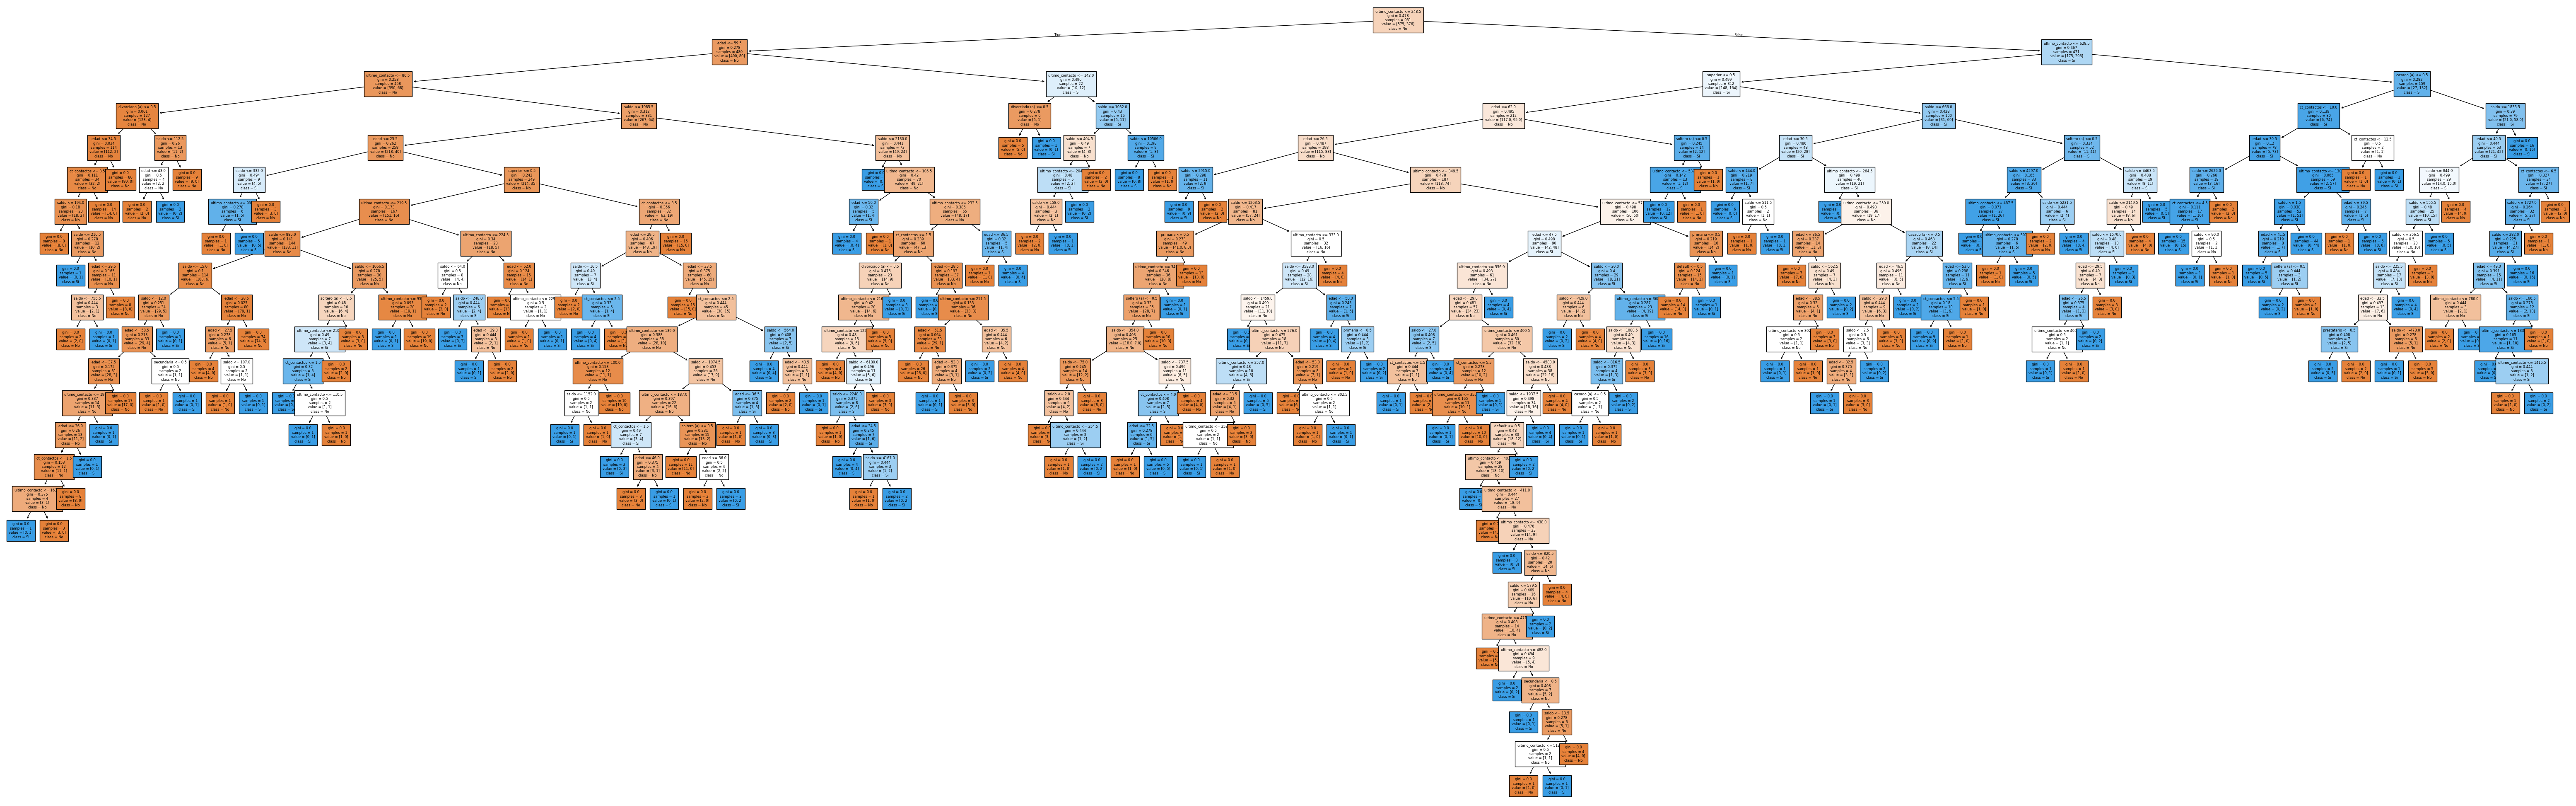

In [69]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True, class_names=['No','Si'], fontsize=6, feature_names=valores_columnas);


In [70]:
modelo_arbol.score(X_train, y_train)

1.0

¿Qué podemos hacer para mejorar nuestro árbol?

##### <font color='blue'>**Para saber más**: cómo funciona el árbol de decisión

El árbol de decisión es un algoritmo de machine learning supervisado que tiene una buena interpretabilidad. Esto significa que es posible tener una comprensión fácil de los pasos que se realizaron para llegar al resultado final de la predicción del modelo. Estos pasos pueden ser representados de forma visual, a partir de un diagrama que indica cada una de las decisiones que se tomaron para llegar a la clasificación de un dato.

Para llegar a una regla que clasifique los datos con una buena tasa de acierto, las decisiones del árbol no pueden ser totalmente aleatorias. Debe haber un sentido en cada elección hecha por el árbol de decisión. Ahora entendamos cómo se hacen estas elecciones:

El primer paso es seleccionar una columna de la base de datos que se utilizará para dividir los datos en 2 subconjuntos. El objetivo es que la mayor cantidad posible de datos se separe en relación con la variable objetivo. Entonces, el mejor resultado posible sería si uno de los subconjuntos tuviera solo datos de una categoría de la variable objetivo y el otro subconjunto tuviera solo datos de la otra categoría restante. Para hacer la mejor elección posible, se prueban diferentes columnas y valores, y aquella que proporcione la mejor separación se elige como la primera regla del árbol de decisión.

Para definir qué es una buena separación, se realizan cálculos matemáticos para obtener la proporción de datos de cada categoría de la variable objetivo dentro de los subconjuntos. El resultado de este cálculo se conoce como métrica de impureza. Existen diferentes tipos de métricas, siendo las más utilizadas la entropía y el índice de Gini. A continuación, se presentan las características de cada una.

**Índice Gini**<br>
Este índice informa el grado de heterogeneidad de los datos. Su objetivo es medir la frecuencia de que un elemento aleatorio de un nodo sea etiquetado de manera incorrecta. En otras palabras, este índice cuantifica y determina la impureza de un nodo mediante el siguiente cálculo:

$$ Gini = 1 - \sum_{i=1}^{k} P(i)^2 $$<br>

Donde:

- **P(i)** representa la frecuencia relativa de las clases en cada uno de los nodos;<br>
- **k** es el número de clases.<br>

Si el índice Gini es igual a 0, esto indica que el nodo es puro. Sin embargo, si su valor se aproxima más al valor 1, el nodo es impuro.

**Entropía**<br>
La idea básica de la entropía es medir el desorden de los datos de un nodo mediante la variable clasificadora. Así como el índice de Gini, se utiliza para caracterizar la impureza de los datos y puede ser calculada mediante la siguiente fórmula:<br>

$$
\text{Entropía} = \sum_{i=1}^{C} -p_i \cdot \log_2(p_i)
$$<br>

Donde:

- **pi** representa la proporción de datos en el conjunto de datos, pertenecientes a la clase específica i;<br>
- **c** es el número de clases.<br>

Después de realizar la primera elección de división, el proceso se repite para cada subconjunto hasta que se alcance una condición de parada o que todos los subconjuntos finales estén totalmente puros, es decir, con solo datos de una de las clases de la variable objetivo. A partir de la regla generada, nuevos datos pueden ser clasificados pasando por cada una de las decisiones del árbol hasta llegar a la elección final.

Si deseas saber más sobre el árbol de decisión, puedes consultar la documentación de la biblioteca Scikit-Learn, que tiene una explicación detallada de cómo funciona y también de la función implementada con el algoritmo:<br>

*Comprendiendo la estructura del árbol de decisión*<br>
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py<br>

*DecisionTreeClassifier*<br>
https://app.aluracursos.com/course/clasificacion-aprendiendo-clasificar-datos-machine-learning/task/91131#:~:text=Comprendiendo%20la%20estructura,DecisionTreeClassifier

In [71]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [72]:
modelo_arbol.score(X_test, y_test)

0.7160883280757098

Esta vez el modelo obtuvo un resultado mejor, de 66% subió a 71%, y eso debido a que en el primer caso nuestro modelo se sobre ajustó (overfitting).<br>

Vamos a graficar nuevamente nuestro modelo.

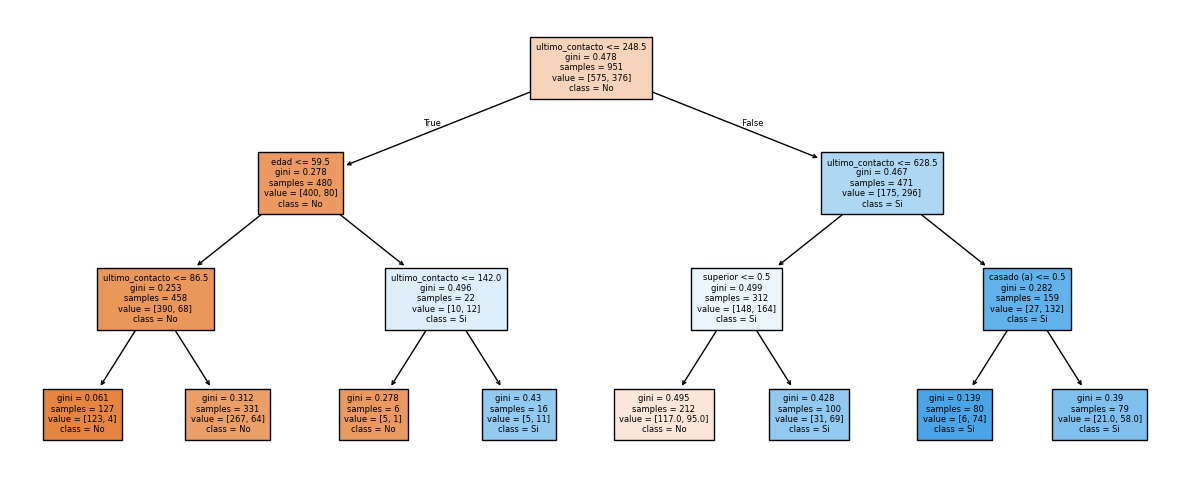

In [73]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol, filled=True, class_names=['No','Si'], fontsize=6, feature_names=valores_columnas);

El modelo comenzó de la misma forma por que mantuvimos el mismo valor de aleatoriedad de 5. Nuevamente hizo todas las comparaciones y llegó a valores de Gini, y aunque no todos llegaron a cero, si hubo casos donde obtuvo 0.13, 0.27, 0.60; nota tb la cantidad de observaciones que pudo clasificar de una forma bien cercana y ahora yo puedo ver el puntaje de mi árbol con el de entrenamiento.

In [74]:
modelo_arbol.score(X_train, y_train)

0.7613038906414301

Podemos ver que al momento de entrenar mi árbol llegó al 76% y generalizó con 71%. De esta manera, únicamente ajustando mi profundida a 3 (3 niveles) ya logré obtener este resultado que superó nuestra baseline y tb nuestro árbol sin ningun tipo de parametrización. de esta manera ya tenemos un modelo de aprendizaje automático.

##### <font color='blue'>**Desafío**: hora de la práctica

Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

1. La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.
1. Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.
1. El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.<br>

Para desarrollar este desafío, dedica un tiempo a reflexionar y explorar. Analiza cuidadosamente los datos y las instrucciones de los enunciados de cada pregunta. La colaboración puede proporcionar ideas valiosas. Por eso, no dudes en colaborar con tus compañeros en la comunidad, intercambiar ideas y compartir soluciones en conjunto.

In [76]:
# Solución para los desafíos
# 1 - Para separar el conjunto de datos entre entrenamiento y prueba, necesitamos utilizar el método train_test_split
# de la biblioteca Scikit-Learn. Primero, vamos a importar la función con el código:

from sklearn.model_selection import train_test_split

In [77]:
# Ahora, vamos a utilizar el método usando el parámetro stratify = y para mantener la proporción de los datos de la
# variable objetivo en los dos conjuntos:

x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x_desafio, y_desafio, stratify = y_desafio,  random_state = 5)

In [78]:
# 2 - Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el DummyClassifier a partir
# de los datos de entrenamiento. Primero, vamos a importar la función:

from sklearn.dummy import DummyClassifier

In [79]:
# Ahora vamos a inicializar el modelo y hacer el ajuste con los datos de entrenamiento. Por último, podemos usar el método
# score para evaluar el desempeño:

dummy = DummyClassifier()
dummy.fit(x_train_d, y_train_d)

dummy.score(x_test_d, y_test_d)

0.7964

In [80]:
# 3 - Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función,
# inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos
# de prueba. Vamos entonces a cada una de estas tareas, utilizando el max_depth=4 al momento de inicializar el modelo:

from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth = 4, random_state =5)
arbol.fit(x_train_d, y_train_d)

arbol.score(x_test_d, y_test_d)

0.8464

In [81]:
# Ahora, para visualizar las elecciones del árbol de decisión, vamos a usar el método plot_tree y vamos a importar matplotlib para
# cambiar el tamaño de la figura:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

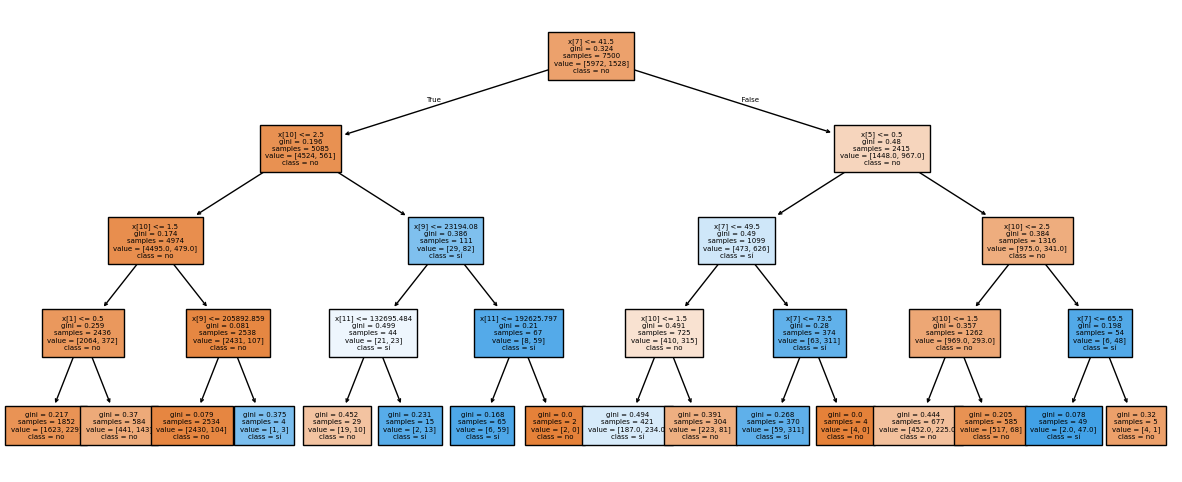

In [82]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

Valora tus etapas y resultados a medida que avanzas en las actividades. Cada proceso es parte crucial de tu aprendizaje. Además, siempre que sea posible, cultiva tu curiosidad y explora el enfoque mencionado anteriormente. Aprovecha cada paso de esta jornada y reconoce en cada desafío una oportunidad para mejorar tu conocimiento en Machine Learning de forma exponencial.

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)


In [86]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


Todos los valores de las variables están ahora normalizados entre 0 y 1

## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

Para poner a prueba este modelo, debo transformar tb mi X de prueba

In [93]:
X_test_normalizado = normalizacion.transform(X_test)

In [94]:
knn.score(X_test_normalizado, y_test)

0.6876971608832808

Nuestro medelo KNN llegó a un resultado de 68%.

##### <font color='blue'>**Para saber más**: ¿Cómo funciona el KNN?

El modelo k-Nearest Neighbors (KNN) es un algoritmo de machine learning ampliamente utilizado. Es una técnica simple, pero eficaz, que se basa en la idea de que los objetos similares tienden a estar cerca unos de otros en un espacio de características. A continuación, exploraremos cómo funciona el KNN y cómo toma decisiones de clasificación.

**Funcionamiento**<br>

El algoritmo KNN opera calculando la distancia entre todos los elementos de la base de datos para determinar la clasificación de un registro, lo cual se realiza al verificar las clases de los elementos que están más cerca.

En esta dinámica, el primer paso consiste en definir un valor de 'k', que es la cantidad de vecinos más cercanos a considerar al momento de hacer la clasificación. La elección de este valor es importante y afecta el rendimiento del modelo. A continuación, se calcula la distancia entre todos los elementos y se almacenan los resultados de estas distancias.

Finalmente, para clasificar cada elemento, se seleccionan los 'k' elementos más cercanos a él y se realiza una votación. La votación consiste en seleccionar la clase que aparece con más frecuencia entre estos vecinos más cercanos.

La normalización de los datos es esencial para este algoritmo, porque se basa en cálculos de distancia. Además, es un algoritmo que demanda mucho computacionalmente cuando hay muchos datos, ya que necesita calcular las distancias entre todos los elementos de entrenamiento.

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

Ya tenemos 3 modelos, Dummy, árbol y KNN. Ahora vamos a compararlos para ver cuál es el mejor y poder usarlos en el futuron con los clientes

In [97]:

lista = [('dummy', dummy, X_test), ('de árbol', modelo_arbol, X_test), ('knn', knn, X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1]}.score(i[2], y_test))')


La exactitud del modelo dummy: DummyClassifier().score(i[2], y_test))
La exactitud del modelo de árbol: DecisionTreeClassifier(max_depth=3, random_state=5).score(i[2], y_test))
La exactitud del modelo knn: KNeighborsClassifier().score(i[2], y_test))


In [98]:
for i in lista:
    exactitud = i[1].score(i[2], y_test)
    print(f'La exactitud del modelo {i[0]}: {exactitud:.4f}')

La exactitud del modelo dummy: 0.6025
La exactitud del modelo de árbol: 0.7161
La exactitud del modelo knn: 0.6877


El modelo de árbol es el que obtuvo el mejor puntaje. Pero no significa que ese modelo sea mejor que los otros.


In [99]:
import pickle

In [100]:
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [101]:
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [102]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [103]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [104]:
nuevo_dato=pd.DataFrame(nuevo_dato)
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


Traemos nuestros modelos

In [111]:
modelo_one_hot = pd.read_pickle('modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('modelo_champion.pkl')

In [110]:
#modelo_arbol.predict(nuevo_dato)

Primero tengo que transformar el nuevo dato a datos que pueda leer mi modelo

In [112]:

nuevo_dato=modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

ValueError: columns are missing: {'miembro_activo', 'tiene_tarjeta_credito', 'sexo_biologico', 'años_de_cliente', 'pais', 'score_credito', 'servicios_adquiridos', 'salario_estimado'}

Debería mostrar array([1]) lo que significa que existe un 70% de probabilidad que este nuevo cliente adhiera.